# Comprehensive Plotting How-To

In [1]:
import qcodes as qc
from qcodes.plots.qcmatplotlib import MatPlot
from qcodes.loops import Loop

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/runner/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


Qcodes Logfile : /home/runner/.qcodes/logs/210419-16702-qcodes.log


Plotting data in QCoDeS can be done using either MatPlot or QTPlot, with matplotlib and pyqtgraph as backends, respectively. 
MatPlot and QTPlot tailor these plotting backends to QCoDeS, providing many features.
For example, when plotting a DataArray in a DataSet, the corresponding ticks, labels, etc. are automatically added to the plot.
Both MatPlot and QTPlot support live plotting while a measurement is running.

One of the main differences between the two backends is that matplotlib is more strongly integrated with Jupyter Notebook, while pyqtgraph uses the PyQT GUI.
For matplotlib, this has the advantage that plots can be displayed within a notebook (though it also has a gui).
The advantage of pyqtgraph is that it can be easily embedded in PyQT GUI's.

This guide aims to provide a detailed guide on how to use each of the two plotting tools.

In [2]:
loc_provider = qc.data.location.FormatLocation(fmt='data/{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider = loc_provider

## MatPlot

The QCoDeS MatPlot relies on the matplotlib package, which is quite similar to Matlab's plotting tools.
It integrates nicely with Jupyter notebook, and as a result, interactive plots can be displayed within a notebook using the following command:

In [3]:
%matplotlib inline

### Simple 1D sweep

As a first example, we perform a simple 1D sweep.
We create two trivial parameters, one for measuring a value, and the other for sweeping the value of the measured parameter.

In [4]:
p_measure = qc.ManualParameter(name='measured_val')
p_sweep = qc.Parameter(name='sweep_val', set_cmd=p_measure.set)

Next we perform a measurement, and attach the `update` method of the `plot` object to the loop, resulting in live plotting.
Note that the resulting plot automatically has the correct x values and labels.

Started at 2021-04-19 07:41:01


DataSet:
   location = 'data/2021-04-19/#003_test_plotting_1D_07-41-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | sweep_val_set | sweep_val    | (21,)
   Measured | measured_val  | measured_val | (21,)
Finished at 2021-04-19 07:41:03


DataSet:
   location = 'data/2021-04-19/#003_test_plotting_1D_07-41-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | sweep_val_set | sweep_val    | (21,)
   Measured | measured_val  | measured_val | (21,)

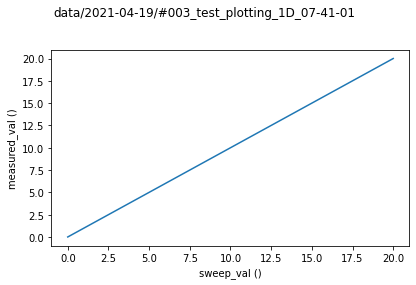

In [5]:
loop = Loop(
    p_sweep.sweep(0, 20, step=1), delay=0.05).each(
        p_measure)
data = loop.get_data_set(name='test_plotting_1D')

# Create plot for measured data
plot = MatPlot(data.measured_val)
# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run()

### Subplots

In a measurement, there is often more than a single parameter that is measured.
MatPlot supports multiple subplots, and upon initialization it will create a subplot for each of the arguments it receives.

Let us create a second parameter that, when measured, always returns the value 10.

In [6]:
p_measure2 = qc.ManualParameter(name='measured_val_2', initial_value=10)

In the example below, three arguments are provided, resulting in three subplots.
By default, subplots will be placed as columns on a single row, up to three columns.
After this, a new row will be created (can be overridden in `MatPlot.max_subplot_columns`).

Multiple DataArrays can also be plotted in a single subplot by passing them as a list in a single arg.
As an example, notice how the first subplot shows multiple values.

Started at 2021-04-19 07:41:03


DataSet:
   location = 'data/2021-04-19/#004_test_plotting_1D_2_07-41-03'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | sweep_val_set  | sweep_val      | (21,)
   Measured | measured_val   | measured_val   | (21,)
   Measured | measured_val_2 | measured_val_2 | (21,)
Finished at 2021-04-19 07:41:05


DataSet:
   location = 'data/2021-04-19/#004_test_plotting_1D_2_07-41-03'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | sweep_val_set  | sweep_val      | (21,)
   Measured | measured_val   | measured_val   | (21,)
   Measured | measured_val_2 | measured_val_2 | (21,)

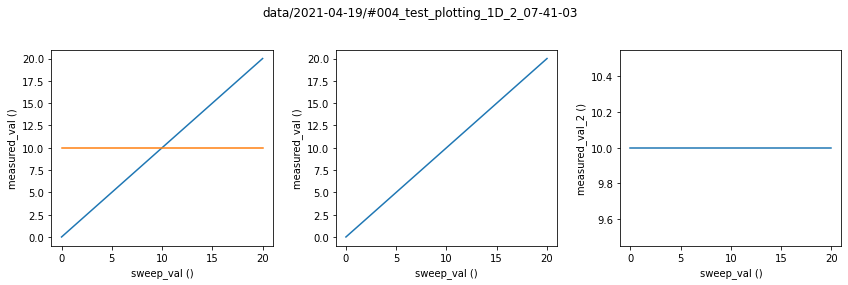

In [7]:
loop = Loop(
    p_sweep.sweep(0, 20, step=1), delay=0.05).each(
        p_measure,
        p_measure2)
data = loop.get_data_set(name='test_plotting_1D_2')

# Create plot for measured data
plot = MatPlot([data.measured_val, data.measured_val_2], data.measured_val, data.measured_val_2)
# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run()

The data arrays don't all have to be passed along during initialization of the MatPlot instance.
We can access the subplots of the plot object as if the plot was a list (e.g. `plot[0]` would give you the first subplot).
To illustrate this, the example below results in the same plot as above.

Started at 2021-04-19 07:41:06


DataSet:
   location = 'data/2021-04-19/#005_test_plotting_1D_3_07-41-05'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | sweep_val_set  | sweep_val      | (21,)
   Measured | measured_val   | measured_val   | (21,)
   Measured | measured_val_2 | measured_val_2 | (21,)
Finished at 2021-04-19 07:41:08


DataSet:
   location = 'data/2021-04-19/#005_test_plotting_1D_3_07-41-05'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | sweep_val_set  | sweep_val      | (21,)
   Measured | measured_val   | measured_val   | (21,)
   Measured | measured_val_2 | measured_val_2 | (21,)

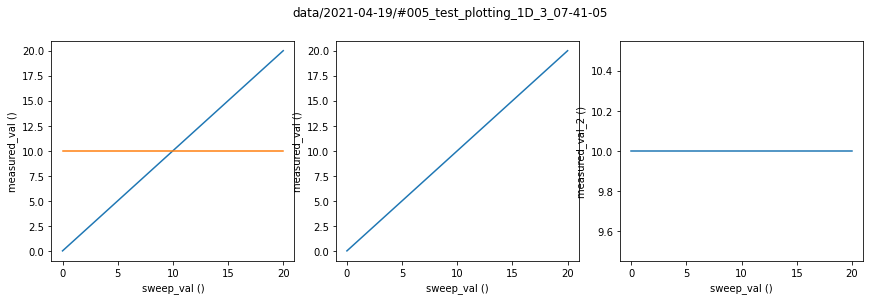

In [8]:
loop = Loop(
    p_sweep.sweep(0, 20, step=1), delay=0.05).each(
        p_measure,
        p_measure2)
data = loop.get_data_set(name='test_plotting_1D_3')

# Create plot for measured data
plot = MatPlot(subplots=3)
plot[0].add(data.measured_val)
plot[0].add(data.measured_val_2)
plot[1].add(data.measured_val)
plot[2].add(data.measured_val_2)

# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run()

Note that we passed the kwarg `subplots=3` to specify that we need 3 subplots.
The `subplots` kwarg can be either an int or a tuple.
If it is an int, it will segment the value such that there are at most three columns.
If a tuple is provided, its first element indicates the number of rows, and the second the number of columns.

Furthermore, the size of the figure is automatically computed based on the number of subplots.
This can be overridden by passing the kwarg `figsize=(x_length, y_length)` upon initialization.
Additionally, `MatPlot.default_figsize` can be overridden to change the default computed figsize for a given subplot dimensionality.

### 2D Plots

As illustrated below, MatPlot can also plot two-dimensional data arrays.
MatPlot automatically handles setting the appropriate x- and y-axes, and also adds a colorbar by default.
Note that we can also plot the individual traces of a 2D array, as shown in the first subplot below.
This is done by passing all the elements (=rows) of the 2D array as a single argument using the splat (*) operator.

In [9]:
p_sweep2 = qc.Parameter(name='sweep_val_2', set_cmd=p_measure2.set)

Started at 2021-04-19 07:41:08


2021-04-19 07:41:09,355 ¦ py.warnings ¦ WARNING ¦ warnings ¦ _showwarnmsg ¦ 110 ¦ /opt/hostedtoolcache/Python/3.7.10/x64/lib/python3.7/site-packages/qcodes/plots/qcmatplotlib.py:399: MatplotlibDeprecationWarning: 
The update_bruteforce function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.
  ax.qcodes_colorbar.update_bruteforce(pc)



DataSet:
   location = 'data/2021-04-19/#006_test_plotting_2D_07-41-08'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | sweep_val_set   | sweep_val    | (21,)
   Setpoint | sweep_val_2_set | sweep_val_2  | (21, 11)
   Measured | measured_val    | measured_val | (21, 11)
Finished at 2021-04-19 07:41:14


DataSet:
   location = 'data/2021-04-19/#006_test_plotting_2D_07-41-08'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | sweep_val_set   | sweep_val    | (21,)
   Setpoint | sweep_val_2_set | sweep_val_2  | (21, 11)
   Measured | measured_val    | measured_val | (21, 11)

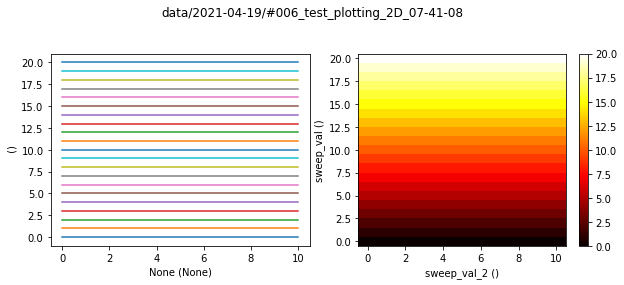

In [10]:
loop = Loop(
    p_sweep.sweep(0, 20, step=1), delay=0.05).loop(
        p_sweep2.sweep(0, 10, step=1), delay=0.01).each(
            p_measure)
data = loop.get_data_set(name='test_plotting_2D')

# Create plot for measured data
plot = MatPlot([*data.measured_val], data.measured_val)
# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run()

In the example above, the colorbar can be accessed via `plot[1].qcodes_colorbar`.
This can be useful when you want to modify the colorbar (e.g. change the color limits `clim`).

Note that the above plot was updated every time an inner loop was completed. 
This is because the update method was attached to the outer loop.
If you instead want it to update within an outer loop, you have to attach it to an inner loop: `loop[0].with_bg_task(plot.update)` (`loop[0]` is the first action of the outer loop, which is the inner loop).

### Interfacing with Matplotlib
As Matplot is built directly on top of Matplotlib, you can use standard Matplotlib functions which are readily available online in Matplotlib documentation as well as StackOverflow and similar sites. Here, we first perform the same measurement and obtain the corresponding figure:

Started at 2021-04-19 07:41:15


2021-04-19 07:41:15,505 ¦ py.warnings ¦ WARNING ¦ warnings ¦ _showwarnmsg ¦ 110 ¦ /opt/hostedtoolcache/Python/3.7.10/x64/lib/python3.7/site-packages/qcodes/plots/qcmatplotlib.py:399: MatplotlibDeprecationWarning: 
The update_bruteforce function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.
  ax.qcodes_colorbar.update_bruteforce(pc)



DataSet:
   location = 'data/2021-04-19/#007_test_plotting_2D_2_07-41-14'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | sweep_val_set   | sweep_val    | (21,)
   Setpoint | sweep_val_2_set | sweep_val_2  | (21, 11)
   Measured | measured_val    | measured_val | (21, 11)
Finished at 2021-04-19 07:41:20


DataSet:
   location = 'data/2021-04-19/#007_test_plotting_2D_2_07-41-14'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | sweep_val_set   | sweep_val    | (21,)
   Setpoint | sweep_val_2_set | sweep_val_2  | (21, 11)
   Measured | measured_val    | measured_val | (21, 11)

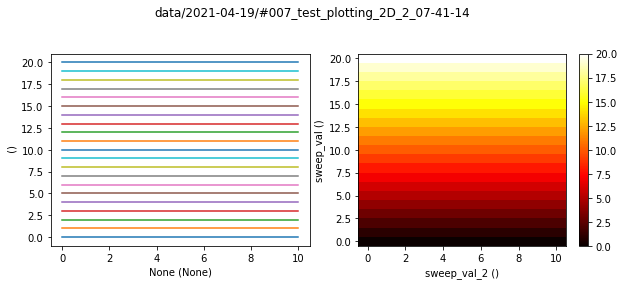

In [11]:
loop = Loop(
    p_sweep.sweep(0, 20, step=1), delay=0.05).loop(
        p_sweep2.sweep(0, 10, step=1), delay=0.01).each(
            p_measure)
data = loop.get_data_set(name='test_plotting_2D_2')

# Create plot for measured data
plot = MatPlot([*data.measured_val], data.measured_val)
# Attach updating of plot to loop
loop.with_bg_task(plot.update)

loop.run()

To use the matplotlib api, we need access to the matplotlib Figure and Axis objects. 
Each subplot has its correspond Axis object, which are grouped together into a single Figure object.
A subplot Axis can be accessed via its index. As an example, we will modify the title of the first axis:

In [12]:
ax = plot[0] # shorthand for plot.subplots[0]
ax.set_title("My left subplot title");

Text(0.5, 1.0, 'My left subplot title')

Note that this returns the actual matplotlib Axis object.
It does have the additional QCoDeS method `Axis.add()`, which allows easily adding of a QCoDeS DataArray. See http://matplotlib.org/api/axes_api.html for documentation of the Matplotlib Axes class.

The Matplotlib Figure object can be accessed via the fig attribute on the QCoDeS Matplot object:

In [13]:
fig = plot.fig
fig.tight_layout();

See http://matplotlib.org/api/figure_api.html for documentation of the Matplotlib Figure class.

Matplotlib also offers a second way to modify plots, namely pyplot.
This can be imported via:

In [14]:
from matplotlib import pyplot as plt

In pyplot, there is always an active axis and figure, similar to Matlab plotting.
Every time a new plot is created, it will update the active axis and figure.
The active Figure and Axis can be changed via `plt.scf(fig)` and `plt.sca(ax)`, respectively.

As an example, the following code will change the title of the last-created plot (the right subplot of the previous figure):

Text(0.5, 1.0, 'My right subplot title')

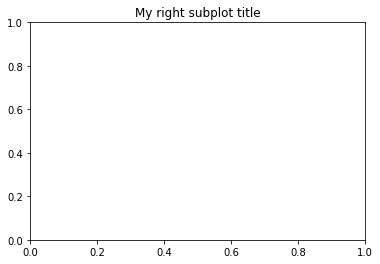

In [15]:
plt.title('My right subplot title');

See https://matplotlib.org/users/pyplot_tutorial.html for documentation on Pyplot

### Event handling

Since matplotlib is an interactive plotting tool, one can program actions that are dependent on events.
There are many events, such as clicking on a plot, pressing a key, etc.

As an example, we can attach a trivial function to occur when the plot object is closed. You can replace this with other functionality, such as stopping the loop.

5

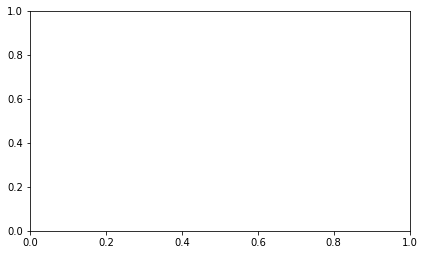

In [16]:
def handle_close(event):
    print('Plot closed')
    
plot = MatPlot()
plot.fig.canvas.mpl_connect('close_event', handle_close);

On a related note, matplotlib also has widgets that can be added to plots, allowing additional interactivity with the dataset.
An example would be adding a slider to show 2D plots of a 3D dataset (e.g. https://matplotlib.org/examples/widgets/slider_demo.html).